# **Big Mart Sales Prediction**
**Problem Statement:**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

The solution is divided into the following sections:

* Data understanding and exploration (EDA)
* Data Preprocessing
* Model building and evaluation
* Predictions

In [274]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
#reading dataset
train = pd.read_csv('/content/train_v9rqX0R.csv')
test = pd.read_csv('/content/test_AbJTz2l.csv')
sample = pd.read_csv('/content/sample_submission_8RXa3c6.csv')

# **1**.**EXPLORATORY** **ANALYSIS**

In [276]:
#exploratory analysis of train data
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [277]:
train.shape #8523 rows, 12 columns

(8523, 12)

In [278]:
train.isna().sum() #null values in 2 cols Item_weight and  Outlet_Size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [279]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [280]:
#statistical summary of traindataset
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [281]:
#unique values
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [282]:
#exploratory analysis of test data
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [283]:
test.shape  # 8523 rows, 11 columns

(5681, 11)

In [284]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [285]:
test.isna().sum() #null values in 2 cols Item_weight and  Outlet_Size

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [286]:
#statistical summary of testdataset
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [287]:
#unique values
test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [288]:
#exploratory analysis of sample dataset
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [289]:
sample.shape # 5681 rows and 3 columns

(5681, 3)

# **Understanding the Data Dictionary**

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

       Variable              Description          
 * Item_Identifier           : Unique product ID          
 * Item_Weight              :Weight of product
 * Item_Fat_Content          : Whether the product is low fat or                         not
 * Item_Visibility             : The % of total display area of all products in a store allocated to the particular product
 * Item_Type                : The category to which the product belongs
 * Item_MRP                :Maximum Retail Price (list price) of the product
 * Outlet_Identifier             : Unique store ID
 * Outlet_Establishment_Year    : The year in which store was established
 * Outlet_Size             : The size of the store in terms of ground area covered
 * Outlet_Location_Type       :The type of city in which the store is located
 * Outlet_Type            :Whether the outlet is just a grocery store or some sort of supermarket
 * Item_Outlet_Sales         :Sales of the product in the
    particular store. This is the outcome variable to be predicted.


In [290]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **Numerical** **features**

<ipython-input-291-6693199c3095>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_Weight'])


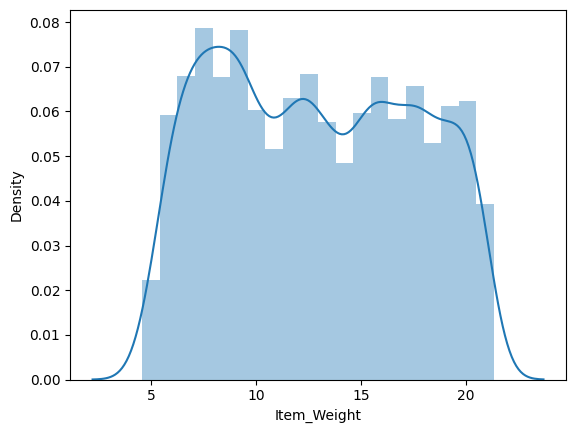

In [291]:
sns.distplot(train['Item_Weight'])
plt.show()

<ipython-input-292-d292d3eb6210>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_Visibility'])


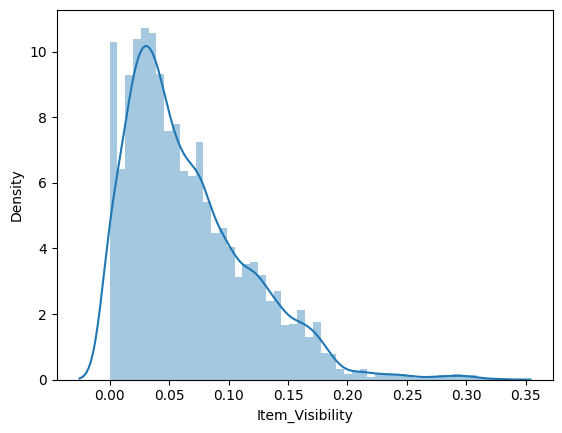

In [292]:
sns.distplot(train['Item_Visibility'])
plt.show()

<ipython-input-293-d1fa3b736c66>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_MRP'])


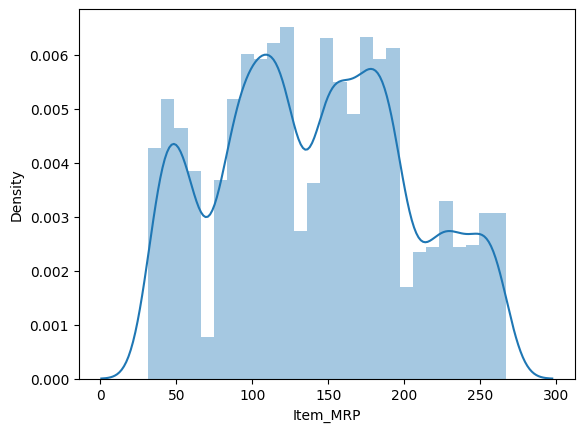

In [293]:
sns.distplot(train['Item_MRP'])
plt.show()

<ipython-input-294-fffac79471b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_Outlet_Sales'])


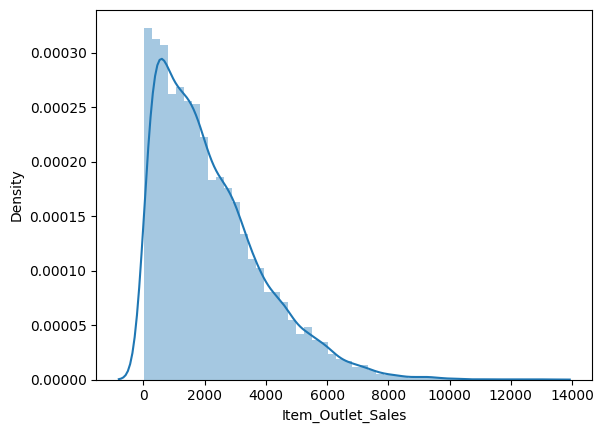

In [294]:
sns.distplot(train['Item_Outlet_Sales'])
plt.show()

<ipython-input-295-95d577310d0d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Outlet_Establishment_Year'])


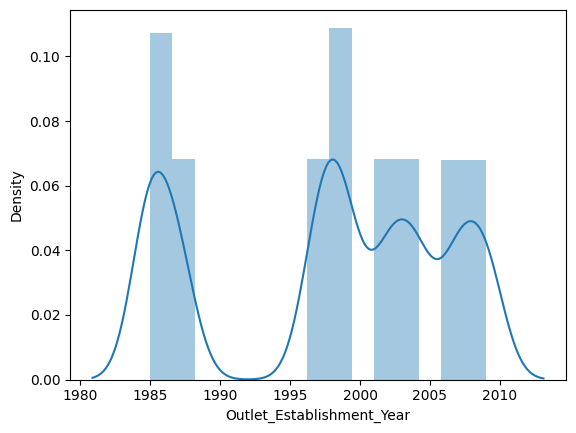

In [295]:
sns.distplot(train['Outlet_Establishment_Year'])
plt.show()

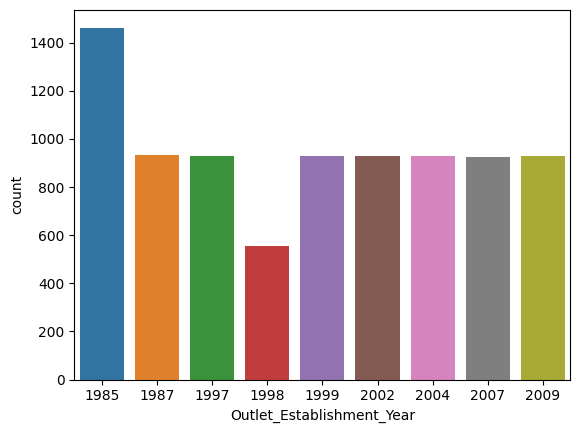

In [296]:
sns.countplot(x='Outlet_Establishment_Year', data=train)
plt.show()

## **Categorical features**

In [297]:
train['Item_Fat_Content'].astype('category').value_counts() #here values are getting repeated or duplicated

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

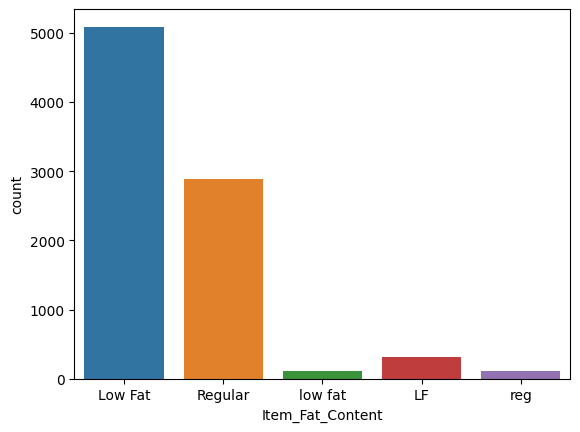

In [298]:
sns.countplot(x='Item_Fat_Content', data=train)
plt.show()

In [299]:
train['Item_Type'].astype('category').value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

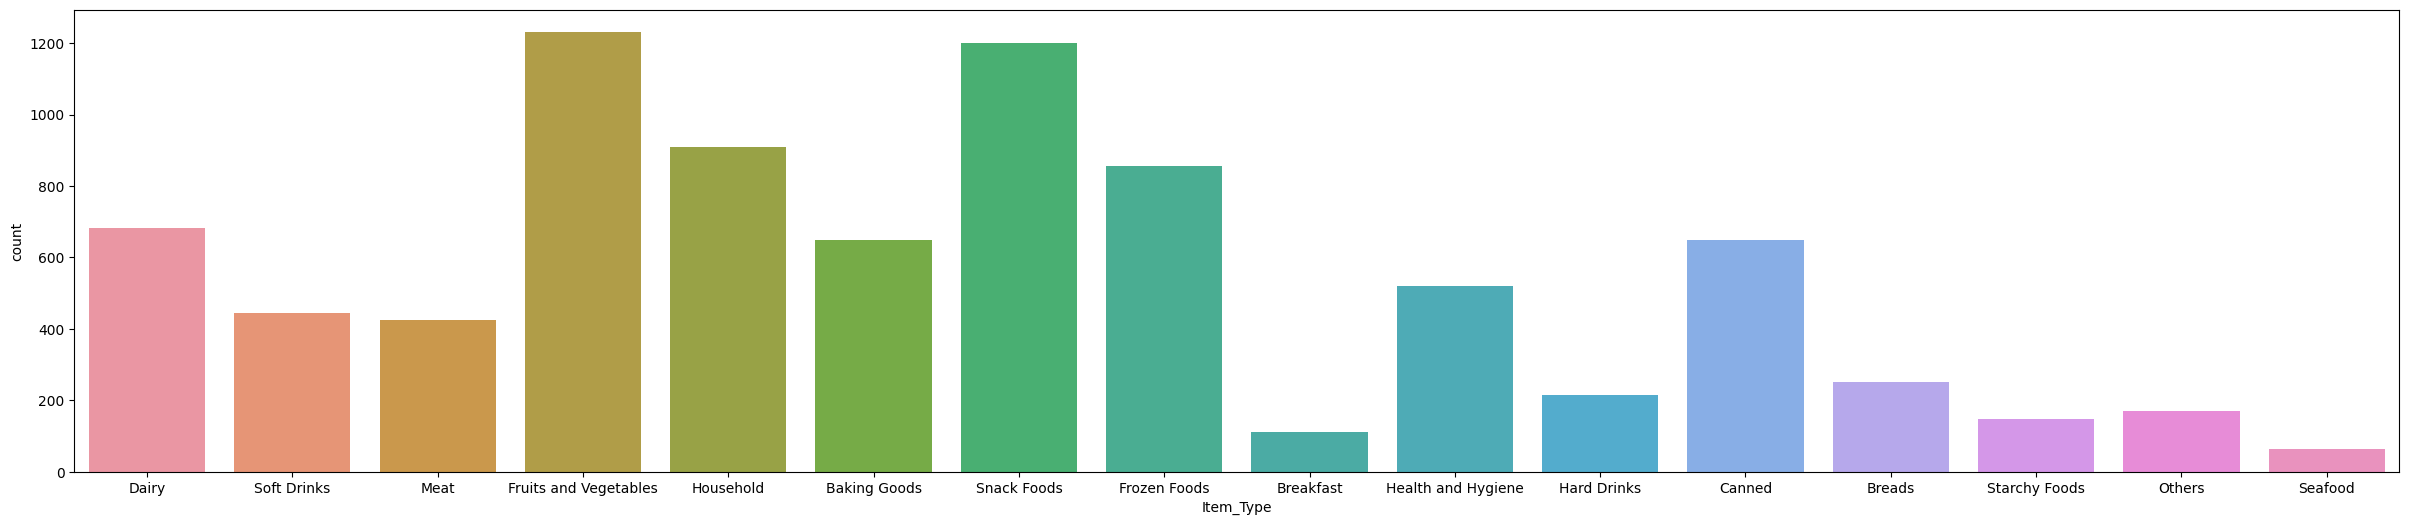

In [300]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=train)
plt.show()

In [301]:
train['Outlet_Size'].astype('category').value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

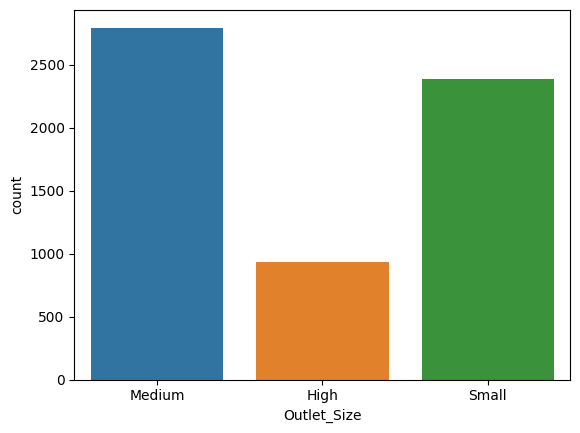

In [302]:
sns.countplot(x ='Outlet_Size',data = train)
plt.show()

In [303]:
train['Outlet_Type'].astype('category').value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

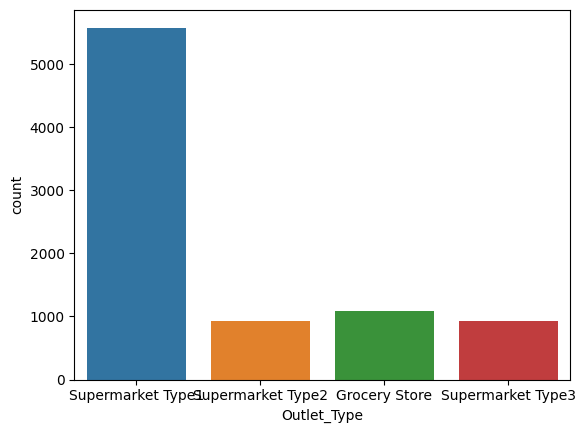

In [304]:
sns.countplot(x ='Outlet_Type',data = train)
plt.show()

In [305]:
train['Outlet_Location_Type'].astype('category').value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

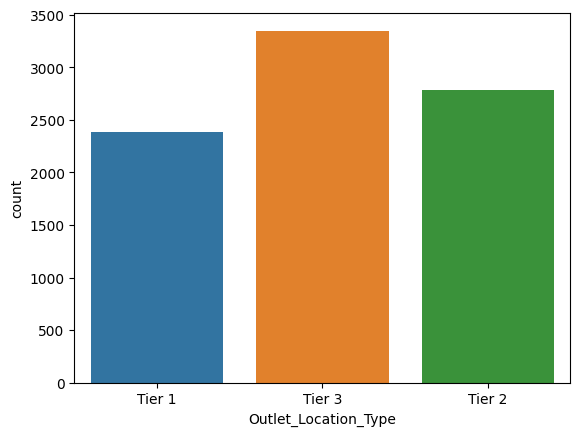

In [306]:
sns.countplot(x ='Outlet_Location_Type',data = train)
plt.show()

# **2. PRE PROCESSING**

In [307]:
#duplicate handling
train.loc[(train['Item_Fat_Content'] == "LF") |
        (train['Item_Fat_Content']  == "low fat")
         , 'Item_Fat_Content'] = 'Low Fat'

In [308]:
train.loc[train['Item_Fat_Content'] == "reg", 'Item_Fat_Content'] = 'Regular'

In [309]:
train['Item_Fat_Content'].astype('category').value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [310]:
#handling missing values

In [311]:
train.isna().sum()  #found missing values for Item_Weight and Outlet_Size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [312]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean()) #filling missing values in 'Item weight' with mean value


In [313]:
mode_of_Outlet_Size = train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc= (lambda x: x.mode()[0]))


In [314]:
mode_of_Outlet_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [315]:
# replacing the missing values in 'Outlet Size' with mode of it in corresponding Outlet_Type
train['Outlet_Size'] = np.where(train['Outlet_Type']=='Grocery Store', 'Small', train['Outlet_Size'])
train['Outlet_Size'] = np.where(train['Outlet_Type']=='Supermarket Type1', 'Small', train['Outlet_Size'])
train['Outlet_Size'] = np.where(train['Outlet_Type']=='Supermarket Type2', 'Medium', train['Outlet_Size'])
train['Outlet_Size'] = np.where(train['Outlet_Type']=='Supermarket Type3', 'Medium', train['Outlet_Size'])


In [316]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [317]:
#by definition Item_Visibility cannot be zero, so we are handling it
train['Item_Visibility'] = np.where(train['Item_Visibility'] == 0, 'NaN', train['Item_Visibility']).astype(float)


In [318]:
train.isna().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [319]:
# Now fill by mean of visbility based on item identifiers
train.Item_Visibility = train.Item_Visibility.fillna(train.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))


In [320]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [321]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052


In [322]:
#label encoding

In [323]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()


In [324]:
label_encoder.fit(train['Item_Fat_Content'])



LabelEncoder()

In [325]:
label_encoder.classes_ = np.array(['Low Fat', 'Regular'])
train.loc[:,'Item_Fat_Content'] = label_encoder.transform(train['Item_Fat_Content'])

<ipython-input-325-2030b3d7427f>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:,'Item_Fat_Content'] = label_encoder.transform(train['Item_Fat_Content'])


In [326]:
label_encoder.fit(train['Outlet_Size'])
label_encoder.classes_ = np.array(['Small', 'Medium'])
train.loc[:,'Outlet_Size'] = label_encoder.transform(train['Outlet_Size'])

<ipython-input-326-13c409c38856>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:,'Outlet_Size'] = label_encoder.transform(train['Outlet_Size'])


In [327]:
label_encoder.fit(train['Outlet_Location_Type'])
label_encoder.classes_ = np.array(['Tier 1', 'Tier 2', 'Tier 3'])
train.loc[:,'Outlet_Location_Type'] = label_encoder.transform(train['Outlet_Location_Type'])

<ipython-input-327-b8d3e9b887cd>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:,'Outlet_Location_Type'] = label_encoder.transform(train['Outlet_Location_Type'])


In [328]:
train['Item_Fat_Content'].astype('category').value_counts()


0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [329]:
train['Outlet_Size'].astype('category').value_counts()

0    6660
1    1863
Name: Outlet_Size, dtype: int64

In [330]:
train['Outlet_Location_Type'].astype('category').value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [331]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Item_Identifier'] = le.fit_transform(train['Item_Identifier'])

train['Item_Type'] = le.fit_transform(train['Item_Type'])

train['Outlet_Identifier'] = le.fit_transform(train['Outlet_Identifier'])

train['Outlet_Type'] = le.fit_transform(train['Outlet_Type'])

In [332]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,0,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,0,0,1,2097.2700
3,1121,19.20,1,0.022911,6,182.0950,0,1998,0,2,0,732.3800
4,1297,8.93,0,0.016164,9,53.8614,1,1987,0,2,1,994.7052


In [333]:
train = train.drop(['Outlet_Establishment_Year'], axis=1)

In [334]:
train.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.070749,7.226681,140.992782,4.722281,0.218585,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.050313,4.209990,62.275067,2.837201,0.413311,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.003575,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.031395,4.000000,93.826500,2.000000,0.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.058100,6.000000,143.012800,5.000000,0.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.098867,10.000000,185.643700,7.000000,0.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,1.000000,2.000000,3.000000,13086.964800


To perform linear regression, the (numeric) target variable should be linearly related to at least one other numeric variable. Let's see whether that's true in this case. A heatmap is pretty useful to visualise multiple correlations in one plot.

In [335]:
correle=train.corr()

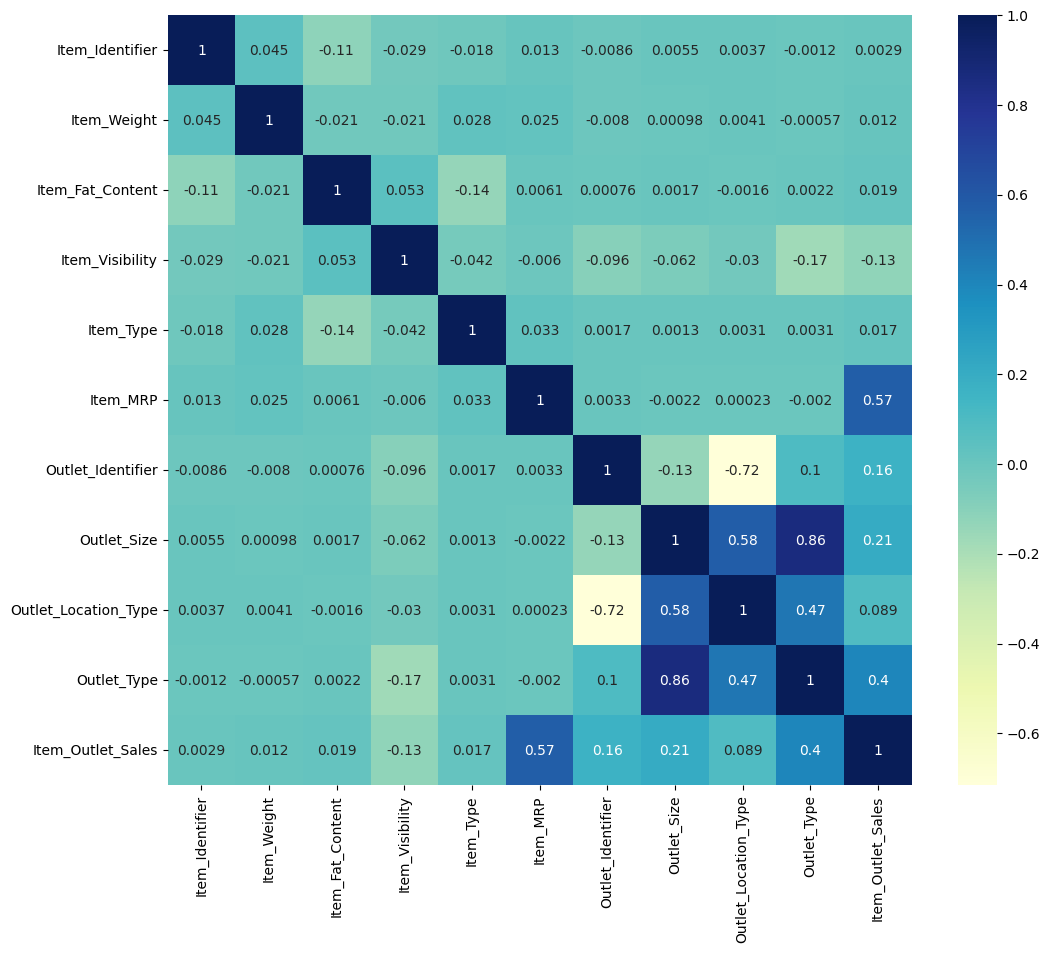

In [336]:
plt.figure(figsize=(12,10))
sns.heatmap(correle, cmap="YlGnBu", annot=True)
plt.show()

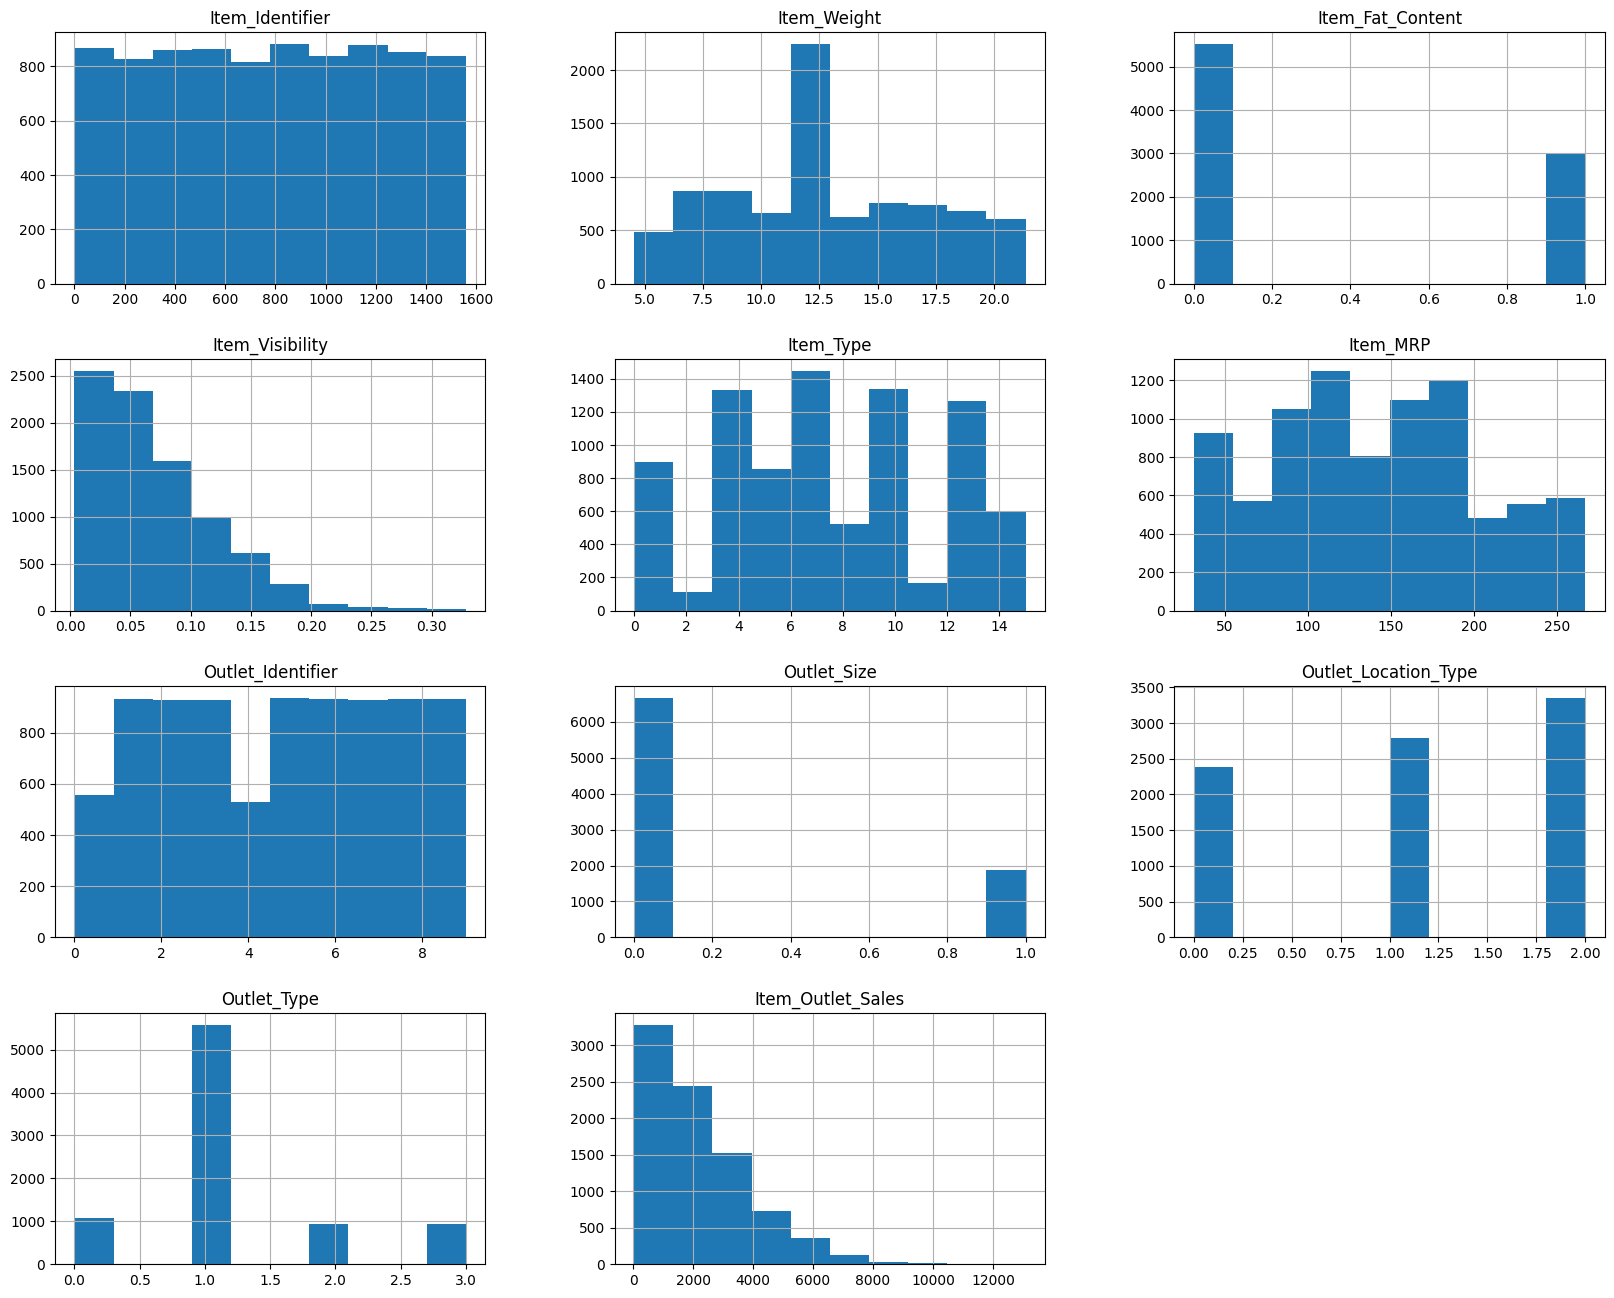

In [337]:
train.hist(figsize=(20,16))
plt.show()

* no features follows normal distribution
* 'Item_Visibility' and 'Item_Outlet_Sales' has exponential distribution.

**Performing all these preprocessing steps to the test data**

In [338]:
test.loc[(test['Item_Fat_Content'] == "LF") |
        (test['Item_Fat_Content']  == "low fat")
         , 'Item_Fat_Content'] = 'Low Fat'
test.loc[test['Item_Fat_Content'] == "reg", 'Item_Fat_Content'] = 'Regular'

In [339]:
# filling missing values
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [340]:
mode_of_Outlet_Size = test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc= lambda x: x.mode())
mode_of_Outlet_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [341]:
test['Outlet_Size'] = np.where(test['Outlet_Type']=='Grocery Store', 'Small', test['Outlet_Size'])
test['Outlet_Size'] = np.where(test['Outlet_Type']=='Supermarket Type1', 'Small', test['Outlet_Size'])
test['Outlet_Size'] = np.where(test['Outlet_Type']=='Supermarket Type2', 'Medium', test['Outlet_Size'])
test['Outlet_Size'] = np.where(test['Outlet_Type']=='Supermarket Type3', 'Medium', test['Outlet_Size'])

In [342]:
test.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)

In [343]:
test.Item_Visibility = test.Item_Visibility.fillna(train.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [344]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [345]:
label_encoder.fit(test['Item_Fat_Content'])
label_encoder.classes_ = np.array(['Low Fat', 'Regular'])
test.loc[:,'Item_Fat_Content'] = label_encoder.transform(test['Item_Fat_Content'])

<ipython-input-345-97538c067eb6>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:,'Item_Fat_Content'] = label_encoder.transform(test['Item_Fat_Content'])


In [346]:
label_encoder.fit(test['Outlet_Size'])
label_encoder.classes_ = np.array(['Small', 'Medium'])
test.loc[:,'Outlet_Size'] = label_encoder.transform(test['Outlet_Size'])
label_encoder.fit(test['Outlet_Location_Type'])
label_encoder.classes_ = np.array(['Tier 1', 'Tier 2', 'Tier 3'])
test.loc[:,'Outlet_Location_Type'] = label_encoder.transform(test['Outlet_Location_Type'])

<ipython-input-346-ee67385f2247>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:,'Outlet_Size'] = label_encoder.transform(test['Outlet_Size'])
<ipython-input-346-ee67385f2247>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:,'Outlet_Location_Type'] = label_encoder.transform(test['Outlet_Location_Type'])


In [347]:
test.loc[:,'Item_Identifier'] = le.fit_transform(test['Item_Identifier'])

test.loc[:,'Item_Type'] = le.fit_transform(test['Item_Type'])

test.loc[:,'Outlet_Identifier'] = le.fit_transform(test['Outlet_Identifier'])

test.loc[:,'Outlet_Type'] = le.fit_transform(test['Outlet_Type'])

<ipython-input-347-00746ed52d1f>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:,'Item_Identifier'] = le.fit_transform(test['Item_Identifier'])
<ipython-input-347-00746ed52d1f>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:,'Item_Type'] = le.fit_transform(test['Item_Type'])
<ipython-input-347-00746ed52d1f>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newva

In [348]:
test = test.drop(['Outlet_Establishment_Year'], axis=1)

### **Splitting Independent and Dependent Features**

In [349]:
x=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales']

In [350]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,0,0,1
1,8,5.92,1,0.019278,14,48.2692,3,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,0,0,1
3,1121,19.20,1,0.022911,6,182.0950,0,0,2,0
4,1297,8.93,0,0.016164,9,53.8614,1,0,2,1


In [351]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [352]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=123)


# **Scaling**

In [353]:
# Import the class MinMaxScaler                                #Normalization
from sklearn.preprocessing import MinMaxScaler
# Create an instance of the class
scaler = MinMaxScaler()
# Use the fit transform method to perform the transformation on train data
x_train.loc[:,:] = scaler.fit_transform(x_train)
## Use the fit transform method to perform the transformation on train data
x_test.loc[:,:] = scaler.transform(x_test)

<ipython-input-353-eab76dcc24e0>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_train.loc[:,:] = scaler.fit_transform(x_train)
<ipython-input-353-eab76dcc24e0>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_test.loc[:,:] = scaler.transform(x_test)


In [354]:
test.loc[:,:] = scaler.fit_transform(test)

<ipython-input-354-1d2215f7e0d0>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:,:] = scaler.fit_transform(test)


# **3.MODEL BUILDING AND EVALUATION**

In [355]:
# Keeping track of model perfomances
models = dict()

1. **Linear** **Regression**

In [356]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [357]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [358]:
from sklearn.metrics import mean_squared_error, r2_score


In [359]:
r2_score(y_test, y_pred)

0.5661916924833768

In [360]:
print("Root Mean Squared Error (RMSE): {}".format(mean_squared_error(y_test, y_pred, squared = False)))

Root Mean Squared Error (RMSE): 1114.4144548098207


In [361]:
RMSE_lr = str(mean_squared_error(y_test, y_pred, squared = False))
RMSE_lr

'1114.4144548098207'

In [362]:
models["Linear reg"] = RMSE_lr

**2** . **Decision** **Tree** **Regressor**

In [363]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=45,max_depth=15)

In [364]:
tree.fit(x_train, y_train)
y_pred=tree.predict(x_test)

In [365]:
mean_squared_error(y_test, y_pred)

1918698.173919696

In [366]:
r2_score(y_test, y_pred)

0.3297897683404959

In [367]:
print("Root Mean Squared Error (RMSE): {}".format(mean_squared_error(y_test, y_pred, squared = False)))

Root Mean Squared Error (RMSE): 1385.170810376719


In [368]:
RMSE_DT = str(mean_squared_error(y_test, y_pred, squared = False))
RMSE_DT

'1385.170810376719'

In [369]:
models["Desicion Tree"] = RMSE_DT

3.**Random** **Forest**

In [370]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=300)


In [371]:
forest.fit(x_train, y_train)
y_pred=forest.predict(x_test)

In [372]:
mean_squared_error(y_test, y_pred)

1291811.143666376

In [373]:
r2_score(y_test, y_pred)

0.5487643353053993

In [374]:
print("Root Mean Squared Error (RMSE): {}".format(mean_squared_error(y_test, y_pred, squared = False)))

Root Mean Squared Error (RMSE): 1136.5787010437843


In [375]:
RMSE_RF = str(mean_squared_error(y_test, y_pred, squared = False))
RMSE_RF

'1136.5787010437843'

In [376]:
models["Random Forest"] = RMSE_RF

4. **Lasso** **Regression**


In [377]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()

In [378]:
lasso.fit(x_train, y_train)
y_pred=lasso.predict(x_test)

In [379]:
mean_squared_error(y_test, y_pred)


1241277.8029591374

In [380]:
r2_score(y_test, y_pred)


0.566415867183776

In [381]:
print("Root Mean Squared Error (RMSE): {}".format(mean_squared_error(y_test, y_pred, squared = False)))

Root Mean Squared Error (RMSE): 1114.1264752976376


In [382]:
RMSE_Lasso = str(mean_squared_error(y_test, y_pred, squared = False))
RMSE_Lasso

'1114.1264752976376'

In [383]:
models["Lasso reg"] = RMSE_Lasso

5. **XG** **Boost** **Regression**

In [384]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [385]:
xgb.fit(x_train, y_train)
y_pred=xgb.predict(x_test)
mean_squared_error(y_test, y_pred)

1395841.2921292346

In [386]:
r2_score(y_test, y_pred)

0.5124261186705075

In [387]:
print("Root Mean Squared Error (RMSE): {}".format(mean_squared_error(y_test, y_pred, squared = False)))

Root Mean Squared Error (RMSE): 1181.4572747794289


In [388]:
RMSE_XGB = str(mean_squared_error(y_test, y_pred, squared = False))
RMSE_XGB

'1181.4572747794289'

In [389]:
models["XG Boost"] = RMSE_XGB

6. **Gradient** **Boosting** **Regressor**

In [390]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

In [391]:
gbt.fit(x_train, y_train)
y_pred = gbt.predict(x_test)

In [392]:
mean_squared_error(y_test, y_pred)

1148131.0792120001

In [393]:
r2_score(y_test, y_pred)

0.5989524527444738

In [394]:
print("Root Mean Squared Error (RMSE): {}".format(mean_squared_error(y_test, y_pred, squared = False)))


Root Mean Squared Error (RMSE): 1071.5087863438173


In [395]:
RMSE_GB = str(mean_squared_error(y_test, y_pred, squared = False))
RMSE_GB

'1071.5087863438173'

In [396]:
models["Gradient Boost"] = RMSE_GB

# **Model** **Selection**

In [397]:
RMSE_lr

'1114.4144548098207'

In [398]:
RMSE_DT

'1385.170810376719'

In [399]:
RMSE_RF

'1136.5787010437843'

In [400]:
RMSE_Lasso

'1114.1264752976376'

In [401]:
RMSE_XGB

'1181.4572747794289'

In [402]:
RMSE_GB

'1071.5087863438173'

**'Gradient Boost' has the least RMSE value**

# 4.**PREDICTIONS**

In [408]:
from numpy.random.mtrand import RandomState
test_pred = forest.predict(test)

In [409]:
test_pred

array([1650.34857999, 1419.03084763,  631.29915115, ..., 1961.29040831,
       3484.21392372, 1324.62981837])

In [411]:
sample['Item_Outlet_Sales'] = test_pred
sample.to_csv('bigmartsale.csv',index = False)
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1650.348580
1,FDW14,OUT017,1419.030848
2,NCN55,OUT010,631.299151
3,FDQ58,OUT017,2508.778095
4,FDY38,OUT027,6134.425849
